In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
#평가지표
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#그림
import seaborn as sns
import matplotlib.pyplot as plt
#ignore warning
import warnings
warnings.filterwarnings("ignore")
#GridsearchCV

In [2]:
#방류량 데이터 쭉 모아보기
SJoutflux=pd.DataFrame()
for x in ["20170601-20180531", "20180601-20190531", "20190601-20200531", "20200601-20210531", "20210601-20220523"]:

    filedir="C:/Users/infec/Desktop/수자원공사 공모전/방류량 정보/"+x+".xlsx"
    outflux=pd.read_excel(filedir, header=2, parse_dates=["Unnamed: 0"])
    outflux.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
    outflux.set_index("Date", inplace=True)
    outflux=outflux.loc[:, ["섬진강", "주암댐"]]
    SJoutflux=pd.concat([SJoutflux, outflux], axis=0)

In [3]:

engdir=["GC", "BS", "SU", "YC", "PN", "HM"]
heightdf2021=pd.DataFrame()
motherdir="C:/Users/infec/Desktop/수자원공사 공모전/지역별 수위자료(2개년)/"
dirlist2021=["광천교 2021", "보성군 2021", "수어천교 2021", "요천대교 2021", "평남리 2021", "회문리 2021"]
dirlist2020=["광천교 2020", "보성군 2020", "수어천교 2020", "요천대교 2020", "평남리 2020", "회문리 2020"]
dirlist2019=["광천교 2019", "보성군 2019", "수어천교 2019", "요천대교 2019", "평남리 2019", "회문리 2019"]
#2021 수위 자료 추출
for misty in dirlist2021:
    filename=motherdir+misty+".xls"
    height=pd.read_excel(filename, parse_dates=["관측일"] )
    height.set_index(["관측일"], inplace=True)
    height=height.loc[:"2021-06-21", ["평균수위"]]
    height.sort_index(ascending=True, inplace=True)
    heightdf2021=pd.concat([heightdf2021, height ], axis=1)
    
heightdf2021.columns=engdir 

heightdf2021.index=pd.to_datetime(heightdf2021.index)
print(heightdf2021)


              GC    BS    SU      YC      PN    HM
관측일                                               
2021-06-21  1.10  2.12  3.02  2.2071  1.6217  0.61
2021-06-22  1.10  2.12  3.04  2.1925  1.6188  0.61
2021-06-23  0.64  2.13  3.05  2.1813  1.6300  0.61
2021-06-24  1.09  2.12  3.01  2.2971  1.6171  0.61
2021-06-25  1.09  2.11  3.05  2.2317  1.6129  0.61
...          ...   ...   ...     ...     ...   ...
2021-09-16  0.97  2.16  3.00  2.0929  1.6038  0.67
2021-09-17  0.65  2.17  3.25  2.1021  1.6092  0.67
2021-09-18  0.64  2.15  3.33  2.0971  1.6063  0.67
2021-09-19  0.65  2.13  3.08  2.0892  1.5796  0.67
2021-09-20  0.64  2.13  3.14  2.0917  1.5625  0.66

[92 rows x 6 columns]


In [4]:
#2019년 수위 자료 추출 
heightdf2019=pd.DataFrame()
for misty in dirlist2019:
    filename=motherdir+misty+".xls"
    height=pd.read_excel(filename, parse_dates=["관측일"] )
    height.set_index(["관측일"], inplace=True)
    height=height.loc[:"2019-06-21", ["평균수위"]]
    height.sort_index(ascending=True, inplace=True)
    heightdf2019=pd.concat([heightdf2019, height ], axis=1)
    
heightdf2019.columns=engdir 

heightdf2019.index=pd.to_datetime(heightdf2019.index)
print(heightdf2019)

              GC    BS    SU      YC      PN    HM
관측일                                               
2019-06-21  0.41  2.14  3.32  2.0721  1.2500  0.77
2019-06-22  0.41  2.11  3.31  2.0821  1.2417  0.76
2019-06-23  0.41  2.15  3.25  2.3975  1.2500  0.76
2019-06-24  0.62  2.15  3.32  2.1104  1.2400  0.76
2019-06-25  1.05  2.18  3.14  2.0792  1.2400  0.77
...          ...   ...   ...     ...     ...   ...
2019-09-16  0.95  2.24  3.46  2.3442  1.3696  0.79
2019-09-17  0.95  2.23  3.43  2.3496  1.3513  0.78
2019-09-18  0.94  2.23  3.35  2.3279  1.3400  0.78
2019-09-19  0.94  2.22  3.33  2.3158  1.3400  0.78
2019-09-20  0.94  2.45  3.28  2.3563  1.3346  0.78

[92 rows x 6 columns]


In [5]:
#2020년 수위 추출 
heightdf2020=pd.DataFrame()
for misty in dirlist2020:
    filename=motherdir+misty+".xls"
    height=pd.read_excel(filename, parse_dates=["관측일"] )
    height.set_index(["관측일"], inplace=True)
    height=height.loc[:"2020-06-21", ["평균수위"]]
    height.sort_index(ascending=True, inplace=True)
    heightdf2020=pd.concat([heightdf2020, height ], axis=1)
    
heightdf2020.columns=engdir 

heightdf2020.index=pd.to_datetime(heightdf2020.index)
heightdf2020=heightdf2020.loc[:"2020-09-20"]
print(heightdf2020)

              GC    BS    SU      YC      PN    HM
관측일                                               
2020-06-21  1.12  2.33  3.44  2.0921  1.3429  0.74
2020-06-22  1.12  2.41  3.41  2.0717  1.3079  0.73
2020-06-23  0.85  2.41  3.42  2.0746  1.2858  0.73
2020-06-24  0.46  2.54  3.49  2.1329  1.3008  0.72
2020-06-25  0.46  2.58  3.43  2.1446  1.3563  0.73
...          ...   ...   ...     ...     ...   ...
2020-09-16  1.11  2.50  3.53  2.3321  1.7988  0.65
2020-09-17  1.11  2.50  3.58  2.2954  1.7663  0.62
2020-09-18  1.11  2.49  3.59  2.2858  1.7729  0.70
2020-09-19  1.11  2.44  3.58  2.2554  1.7254  0.61
2020-09-20  1.11  2.28  3.53  2.2392  1.7300  0.64

[92 rows x 6 columns]


In [6]:
#TLCC를 활용하기 위한 함수 작성
def crosscorr(datax, datay, lag=0, wrap=False):
    
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag).dropna())
def SJmovingseries(series, window):
    return series.rolling(window=window).mean()[window:]
def SJoffsetplot2021(point,lags1, lags2, avdate):   
    empty=[] 
    d1=SJmovingseries(SJoutflux["섬진강"], avdate)["2021-05-21":"2021-09-10"]
    d2=heightdf2021[point]
    for lags in range(lags1,lags2+1):
        x=crosscorr(d1, d2, lags)
        empty.append([lags, x])

    offsetdf=pd.DataFrame(empty, columns=["lags", "x"])
    offsetdf.set_index(["lags"], inplace=True)
    plt.plot(offsetdf, label=point)
    plt.title(point)
    plt.xlabel("lags")
    plt.ylabel("Corr")
    plt.legend(loc="best")
    plt.axhline(0)
    
    
def SJoffsetplot2020(point,lags1, lags2, avdate):   
    empty=[] 
    d1=SJmovingseries(SJoutflux["섬진강"], avdate)["2020-05-21":"2020-09-10"]
    d2=heightdf2020[point]
    for lags in range(lags1,lags2+1):
        x=crosscorr(d1, d2, lags)
        empty.append([lags, x])

    offsetdf=pd.DataFrame(empty, columns=["lags", "x"])
    offsetdf.set_index(["lags"], inplace=True)
    plt.plot(offsetdf, label=point)
    plt.title(point)
    plt.xlabel("lags")
    plt.ylabel("Corr")
    plt.legend(loc="best")
    plt.axhline(0)

def SJoffsetplot2019(point,lags1, lags2, avdate):   
    empty=[] 
    d1=SJmovingseries(SJoutflux["섬진강"], avdate)["2019-05-21":"2019-09-10"]
    d2=heightdf2019[point]
    for lags in range(lags1,lags2+1):
        x=crosscorr(d1, d2, lags)
        empty.append([lags, x])

    offsetdf=pd.DataFrame(empty, columns=["lags", "x"])
    offsetdf.set_index(["lags"], inplace=True)
    plt.plot(offsetdf, label=point)
    plt.title(point)
    plt.xlabel("lags")
    plt.ylabel("Corr")
    plt.legend(loc="best")
    plt.axhline(0)    
    
#사용법: data는 heightdf2021 등, 시작날짜 끝날짜는 알아서 연도에 맞게. 
def SJoffsetdf(dirs, lags1, lags2, data, start="", end="" ):
    global fullsetdf, empty
    d1=SJmovingseries(SJoutflux["섬진강"], 5)[start:end]
    for i in dirs:
        
        d2=data[i]
        for lags in range(lags1,lags2+1):
            x=crosscorr(d1, d2, lags)
            empty.append([i, lags, x])
        offsetdf=pd.DataFrame(empty, columns=["point", "lags", "Corr"])
        fullsetdf=pd.concat([fullsetdf, offsetdf], axis=0)

    return fullsetdf


In [7]:
#강수량 정보 추출
motherdir2="C:/Users/infec/Desktop/수자원공사 공모전/일일 강수량/"
engdir2=["가장교 엑셀", "광천교 엑셀", "수어천교 엑셀", "요천대교 엑셀", "평남리 엑셀", "회문리 엑셀"]
filedir=".xlsx"
#pd.read_excel(motherdir2+engdir2[0]+filedir, engine="openpyxl")

In [8]:
def raindf(point="", name=""):
    data=pd.read_excel(motherdir2+point+filedir, engine="openpyxl", parse_dates=["강수분석"])
    data=data.iloc[7:, :]
    data.drop(["Unnamed: 1"], axis=1, inplace=True)
    data.rename(columns={"Unnamed: 2": "Rain"}, inplace=True )
    data["Rain"].fillna(0, inplace=True)
    data.set_index(["강수분석"], inplace=True)
    rain2019=data[0:80]
    rain2021=data[-92:-12]
    raininfo=pd.concat([rain2019, rain2021], axis=0)
    raininfo.reset_index(inplace=True)
    raininfo["강수분석"]=pd.to_datetime(raininfo["강수분석"])
    raininfo.set_index(["강수분석"], inplace=True)
    raininfo.rename(columns={"Rain": name}, inplace=True)
    return raininfo

In [9]:
SJx2021=SJmovingseries(SJoutflux["섬진강"], 1)["2021-05-21":"2021-09-10"]
SJx2019=SJmovingseries(SJoutflux["섬진강"], 1)["2019-05-21":"2019-09-10"]
JAx2021=SJmovingseries(SJoutflux["주암댐"], 1)["2021-05-21":"2021-09-10"]
JAx2019=SJmovingseries(SJoutflux["주암댐"], 1)["2019-05-21": "2019-09-10"]
SJx=pd.concat([SJx2019, SJx2021], axis=0)
JAx=pd.concat([JAx2019, JAx2021], axis=0)
#이동평균은 다 작성했으니 이제 lag 이용
SJx=SJx.shift(11).dropna()
JAx=JAx.shift(-2).dropna()
SJx=SJx.reset_index()
JAx=JAx.reset_index()
Tx=pd.merge(SJx, JAx, how="inner", on="Date")
Tx

,Date,섬진강,주암댐
0,2019-06-01,27.55,13.91
1,2019-06-02,27.60,13.78
2,2019-06-03,30.55,13.72
3,2019-06-04,36.28,13.67
4,2019-06-05,36.10,14.19
...,...,...,...
208,2021-09-04,4.95,18.35
209,2021-09-05,4.97,17.84
210,2021-09-06,5.01,17.88
211,2021-09-07,5.21,17.78


In [10]:
#이제 y 데이터 만들기.
#y가 여러 개 있으니까 지점별로 일단 2019, 2021 concat 하는 함수 작성
def yconcat(point):
    y2021=heightdf2021[point]["2021-06-21":"2021-09-08"]
    y2019=heightdf2019[point]["2019-06-21":"2019-09-08"]
    concated=pd.concat([y2019, y2021], axis=0)
    return concated
GCy=yconcat("GC")
BSy=yconcat("BS")
SUy=yconcat("SU")
YCy=yconcat("YC")
PNy=yconcat("PN")
HMy=yconcat("HM")

ybfs=pd.concat([GCy, BSy, SUy, YCy, PNy, HMy], axis=1)
print(ybfs)

              GC    BS    SU      YC      PN    HM
관측일                                               
2019-06-21  0.41  2.14  3.32  2.0721  1.2500  0.77
2019-06-22  0.41  2.11  3.31  2.0821  1.2417  0.76
2019-06-23  0.41  2.15  3.25  2.3975  1.2500  0.76
2019-06-24  0.62  2.15  3.32  2.1104  1.2400  0.76
2019-06-25  1.05  2.18  3.14  2.0792  1.2400  0.77
...          ...   ...   ...     ...     ...   ...
2021-09-04  1.12  2.20  3.00  2.2192  1.7517  0.69
2021-09-05  1.12  2.19  3.02  2.1850  1.7108  0.68
2021-09-06  1.12  2.19  3.09  2.2267  1.7154  0.68
2021-09-07  1.12  2.19  3.11  2.2204  1.7550  0.68
2021-09-08  1.12  2.19  3.12  2.1871  1.7483  0.69

[160 rows x 6 columns]


In [11]:
yb=ybfs.reset_index()
yb.rename(columns={"관측일":"Date"}, inplace=True )
yb

,Date,GC,BS,SU,YC,PN,HM
0,2019-06-21,0.41,2.14,3.32,2.0721,1.2500,0.77
1,2019-06-22,0.41,2.11,3.31,2.0821,1.2417,0.76
2,2019-06-23,0.41,2.15,3.25,2.3975,1.2500,0.76
3,2019-06-24,0.62,2.15,3.32,2.1104,1.2400,0.76
4,2019-06-25,1.05,2.18,3.14,2.0792,1.2400,0.77
...,...,...,...,...,...,...,...
155,2021-09-04,1.12,2.20,3.00,2.2192,1.7517,0.69
156,2021-09-05,1.12,2.19,3.02,2.1850,1.7108,0.68
157,2021-09-06,1.12,2.19,3.09,2.2267,1.7154,0.68
158,2021-09-07,1.12,2.19,3.11,2.2204,1.7550,0.68


In [12]:
#outlier 제거하는 함수 만들기 
def remove_outlier(point, weight=1.5, year=None):
    data=year[[point]]
    level_1q=data.quantile(0.25)
    level_3q=data.quantile(0.75)
    IQR=level_3q-level_1q
    data=data[(data<=level_3q+(weight*IQR) )&( data>=level_1q-(weight*IQR))]
    data.dropna(inplace=True)
    return data
def find_outlier(point, weight=1.5, year=None):
    data=year[[point]]
    level_1q=data.quantile(0.25)
    level_3q=data.quantile(0.75)
    IQR=level_3q-level_1q
    data=data[(data>level_3q+(weight*IQR) ) |( data<level_1q-(weight*IQR))]
    data.dropna(inplace=True)
    return data
#광천교를 예시로 한번 해보자 

In [14]:
Totaldf=pd.merge(Tx, yb, how="inner", on="Date")
Totaldf.set_index(["Date"], inplace=True)

BSR=raindf(point="가장교 엑셀", name="BSR")
GCR=raindf(point="광천교 엑셀", name="GCR")
SUR=raindf(point="수어천교 엑셀", name="SUR")
YCR=raindf(point="요천대교 엑셀", name="YCR")
PNR=raindf(point="평남리 엑셀", name="PNR")
HMR=raindf(point="회문리 엑셀", name="HMR")
Totaldf=pd.concat([Totaldf, GCR, SUR, YCR, PNR, HMR], axis=1)
Totaldf
for i in Totaldf.columns:
    if i not in ["GC", "BS", "SU", "YC", "PN", "HM"]:
        Ss=StandardScaler()
        Totaldf[i]=Ss.fit_transform(Totaldf[[i]])

In [15]:
#평가지표 별 점수 나타낼 함수 만들기
def RMSE(value):
    return np.sqrt(value)
scorename=["RMSE", "R2", "MSLE"]
def accuracy_score(test=None, real=None):
    global scorelist
    scorelist=[]
    rmse=RMSE(mean_squared_error(test, real))
    print("RMSE score: ", rmse, "\n")
    r2=r2_score(test, real)
    print("r2 score: ", r2, "\n")
    msle=mean_squared_log_error(test, real)
    print("MSLE: ", msle)
    scorelist.append(rmse)
    scorelist.append(r2)
    scorelist.append(msle)
    return scorelist
#이제 제대로 된 모델 작성해보자
#먼저 쉬운 것부터. 평남리 회문리만
#Randomforestregressor 모델 하나 만들고
#poly-linear도 만들고
#poly-elastic도 만들자

#이후 voting regressor로 voting까지 해보기 


#먼저 지역 입력하면 x, y train, test 데이터까지 만들어주는 함수 작서해보자
def tillsplit(point=None, spec=None, spw=1.5, dam=None, rain=None):
    y_data=remove_outlier(point, weight=spw, year=spec)
    x=Totaldf[[rain ,dam]].loc[y_data.index][[rain, dam]]
    y=y_data.copy()
    y=y.values
    X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=156)
    return X_train, X_test, y_train, y_test, x, y


In [16]:
Rf=RandomForestRegressor(n_estimators=10, bootstrap=True, criterion="mse", max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features="auto")
X_train, X_test, y_train, y_test, x, y=tillsplit(point="PN", spec=Totaldf, spw=1.5, dam="섬진강", rain="PNR")
Rf_param_grid={"min_samples_leaf": [1, 2, 4], "n_estimators": [5, 10, 20, 30, 40, 50, 60, 70, 90], "bootstrap": [True, False], "min_samples_split":[1, 2, 3, 4, 5]}
Rfsearch=GridSearchCV(Rf, Rf_param_grid, n_jobs=2, cv=3)
Rfsearch.fit(X_train, y_train)
Rfsearch.best_params_

{'bootstrap': True,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 60}

In [17]:
Rf=RandomForestRegressor(n_estimators=20, bootstrap=True, criterion="mse", max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=2, max_features="auto")
Rf.fit(X_train, y_train)
pred=Rf.predict(X_test)
accuracy_score(y_test, pred)

RMSE score:  0.21622471699367327 

r2 score:  -0.8826748212852462 

MSLE:  0.007308928755192194


[0.21622471699367327, -0.8826748212852462, 0.007308928755192194]

In [18]:
Totaldf.describe()

,섬진강,주암댐,GC,BS,SU,YC,PN,HM,GCR,SUR,YCR,PNR,HMR
count,1.600000e+02,1.600000e+02,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02
mean,-6.411538e-16,1.665335e-17,1.01500,2.425625,3.229563,2.335481,1.583680,0.735625,-4.787837e-17,-7.632783e-18,-7.910339e-17,8.049117e-17,5.551115e-17
std,1.003140e+00,1.003140e+00,0.26578,0.566708,0.211578,0.240692,0.297381,0.106957,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00
min,-2.436396e+00,-4.824345e-01,0.37000,2.110000,2.830000,2.072100,1.240000,0.580000,-3.679310e-01,-3.360534e-01,-4.321788e-01,-4.563374e-01,-4.865912e-01
25%,-1.256769e-01,-3.542624e-01,0.92000,2.197500,3.040000,2.195000,1.356275,0.630000,-3.679310e-01,-3.360534e-01,-4.321788e-01,-4.563374e-01,-4.865912e-01
50%,3.355531e-01,-2.656272e-01,1.10000,2.230000,3.260000,2.256250,1.522900,0.770000,-3.679310e-01,-3.360534e-01,-4.267225e-01,-4.563374e-01,-4.797154e-01
75%,7.739373e-01,-2.087270e-01,1.11000,2.505000,3.380000,2.380125,1.695625,0.790000,-1.100281e-01,-2.703249e-01,-1.852780e-01,-8.941692e-02,-9.982790e-02
max,9.376651e-01,6.288103e+00,1.77000,7.090000,3.900000,3.429600,2.932900,1.330000,7.213994e+00,6.736334e+00,7.430454e+00,6.563010e+00,4.780265e+00


<AxesSubplot:>

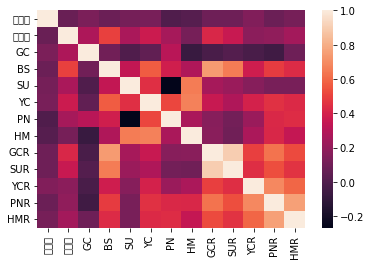

In [20]:
sns.heatmap(Totaldf.corr())